In [103]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def read_img(path):
  img = cv2.imread(path)
  return np.array(img[:,:,::-1], np.uint8)

def LBP(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_ = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    res =  np.zeros_like(img)
    for y in range(1,img_.shape[0]-1):
        for x in range(1,img_.shape[1]-1):
            bit_0 = 1 if img_[y-0][x-1] >= img_[y][x] else 0
            bit_1 = 1 if img_[y-1][x-1] >= img_[y][x] else 0
            bit_2 = 1 if img_[y-1][x-0] >= img_[y][x] else 0
            bit_3 = 1 if img_[y-1][x+1] >= img_[y][x] else 0
            bit_4 = 1 if img_[y-0][x+1] >= img_[y][x] else 0
            bit_5 = 1 if img_[y+1][x+1] >= img_[y][x] else 0
            bit_6 = 1 if img_[y+1][x+0] >= img_[y][x] else 0
            bit_7 = 1 if img_[y+1][x-1] >= img_[y][x] else 0
            
            value = bit_7*128 + bit_6*64 + bit_5*32 + bit_4*16 + bit_3*8 + bit_2*4+ bit_1*2 + bit_0*1
            # value = bit_7*np.power(2,7) + bit_6*np.power(2,6) + bit_5*np.power(2,5) + bit_4*np.power(2,4) + bit_3*np.power(2,3) + bit_2*np.power(2,2) + bit_1*np.power(2,1) + bit_0*np.power(2,0)
            res[y-1][x-1] = value
    return res

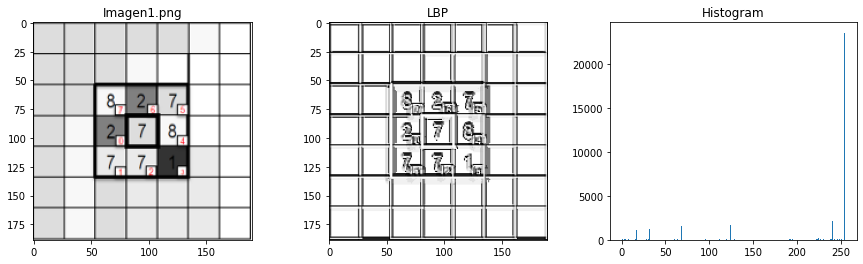

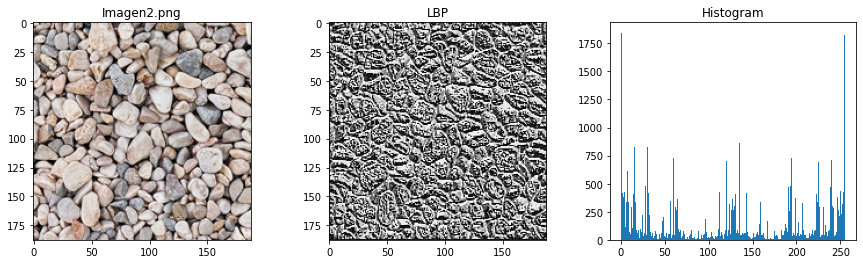

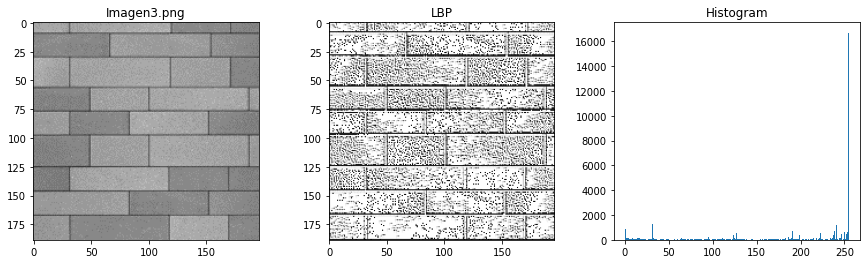

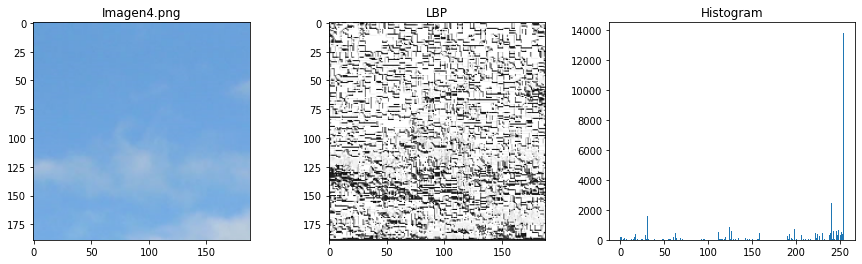

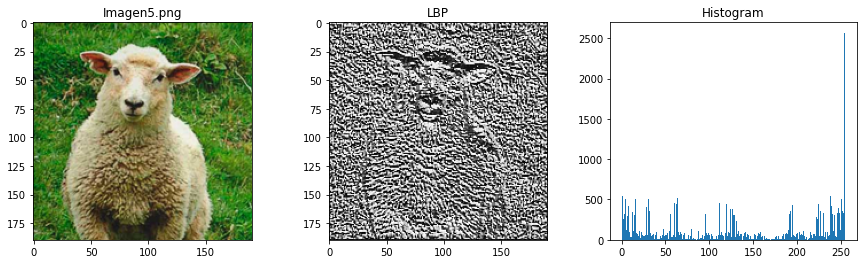

In [106]:
files = os.listdir('./')
img_files = [f for f in files if f[-3:]=='png']

for img_f in img_files:
    img_path = r'C:\Users\zerba\Documents\UBA\Repos\Repositorios de Eloy\UBA-CV1\TP4\Imagen2.png'
    img = read_img(os.path.join('./',img_f))
    img_LBP = LBP(img)
    plt.figure(figsize = (15,4))
    plt.subplot(131)
    plt.imshow(img)
    plt.title(img_f)
    plt.subplot(132)
    plt.imshow(img_LBP, cmap = 'gray')
    plt.title('LBP')
    plt.subplot(133)
    plt.hist(img_LBP.flatten(),bins = 256);
    plt.title('Histogram')




## Conclusiones
Se onserva para los diferentes casos que el histograma refleja el contenido de tezturas existente en la imagen.
En imagenes mas homogeneas en textura como en las imagenes 1,3 y 4, el histograma refleja componentes que destacan sobre otras en valor, convirtiendolas en las texturas más representativas de la imagen.

En el resto de las imagenes, con texturas variadas, el histograma refleja esto mediante la aparicion de un numero mayor de patrones relevantes en la imagen.